# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import sklearn
import imblearn
import xgboost
import threadpoolctl

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Python Course/BankChurners.csv")

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Overview

- Observations
- Sanity checks

In [ ]:
data.shape

(10127, 21)

In [ ]:
#let us find missing data
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


Education and Marital status has missing values

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#let us drop clientnum
data.drop('CLIENTNUM',axis=1,inplace=True)

In [ ]:
#let us convert attrition flag to binary
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

In [ ]:
data['Customer_Age'].unique()

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27])

In [ ]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
#Let us convert education level to numeric value
data['Education_Level'] = data['Education_Level'].map({'Unknown':0,'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6})

In [ ]:
data['Education_Level'].unique()

array([ 2.,  4.,  1., nan,  3.,  5.,  6.])

In [ ]:
data['Marital_Status'].unique()

array(['Married', 'Single', nan, 'Divorced'], dtype=object)

In [ ]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

In [ ]:
#Let us convert Income_Category to numeric values
data['Income_Category'] = data['Income_Category'].map({'abc':0,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'120K +':5})


In [ ]:
data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,2.0,Married,3.0,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,4.0,Single,1.0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,4.0,Married,4.0,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,2.0,NaN,1.0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,1.0,Married,3.0,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

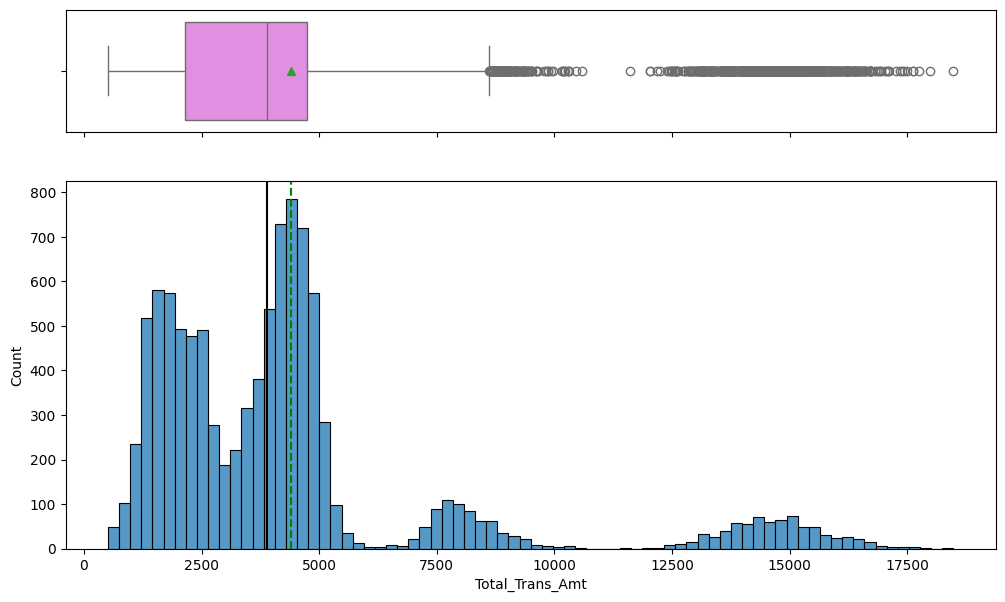

In [ ]:
histogram_boxplot(data, 'Total_Trans_Amt')

Transaction amount is right skewed, most of the transactions are on the lower end of the spectrum

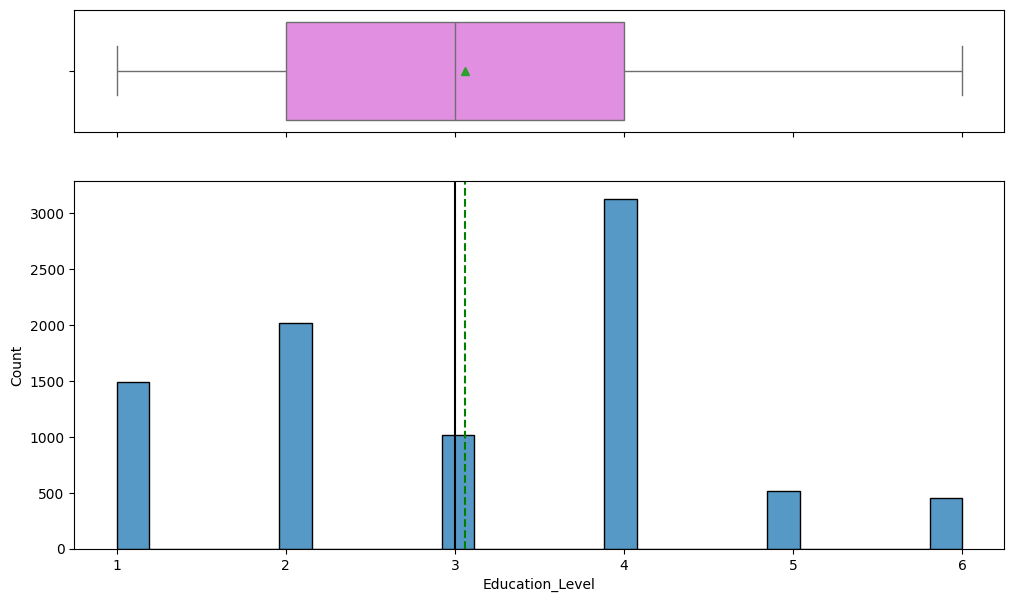

In [ ]:
histogram_boxplot(data, 'Education_Level')

Most of the customers are graduates

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

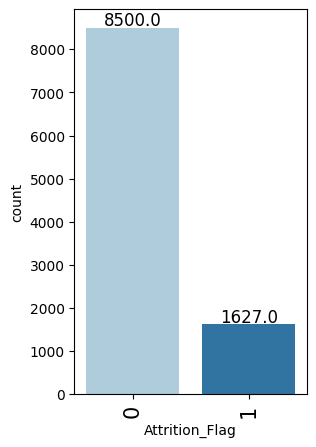

In [ ]:
labeled_barplot(data,'Attrition_Flag')

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
4.0              2641   487  3128
2.0              1707   306  2013
1.0              1250   237  1487
3.0               859   154  1013
6.0               356    95   451
5.0               424    92   516
------------------------------------------------------------------------------------------------------------------------


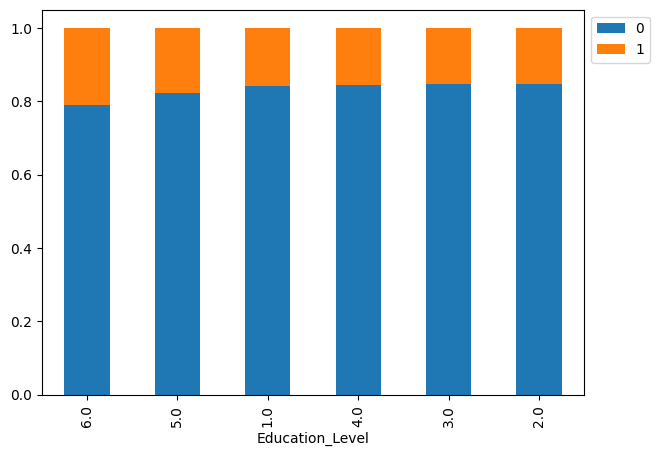

In [ ]:
stacked_barplot(data,'Education_Level','Attrition_Flag')

No noticeable pattern between education and attrition

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

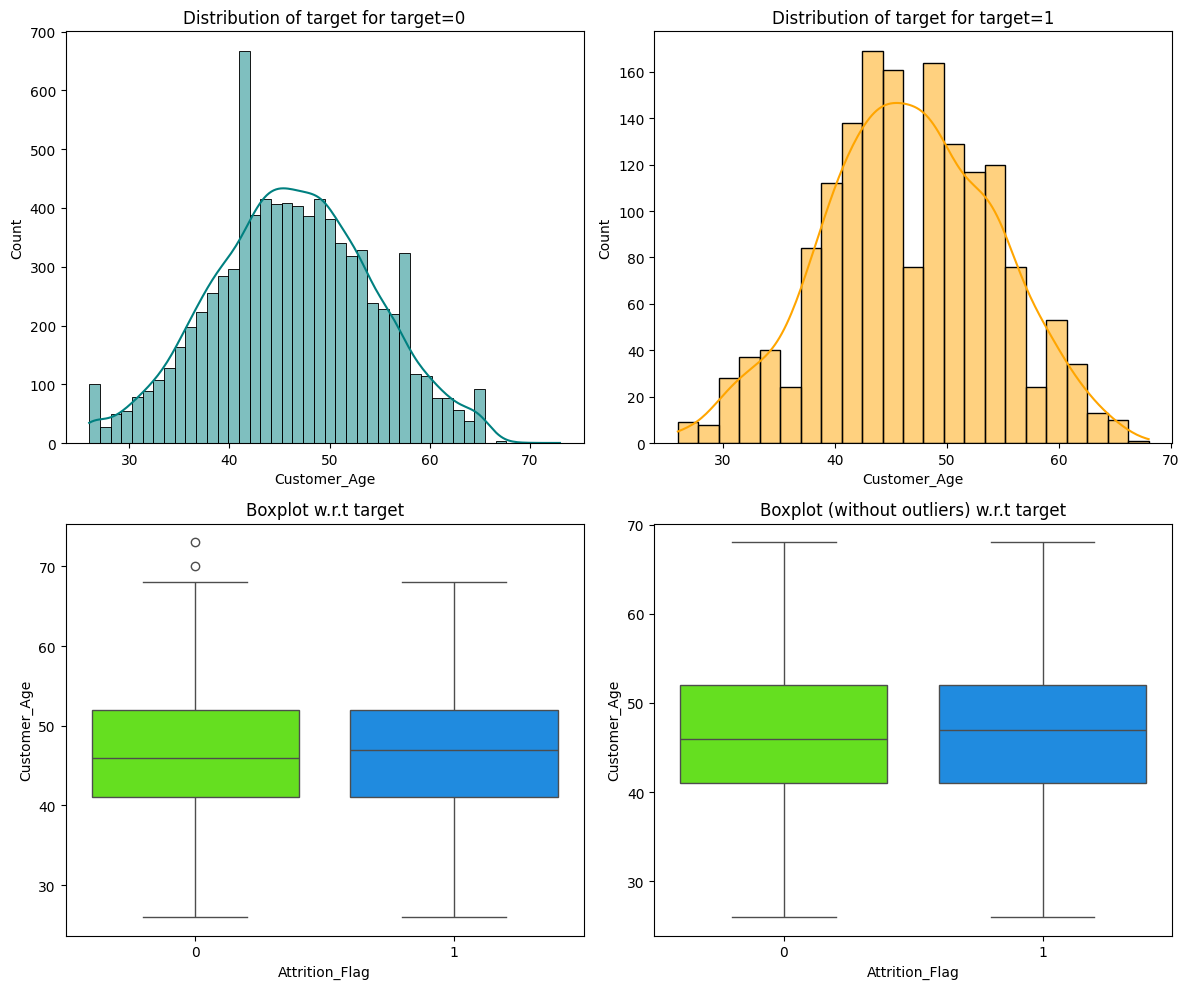

In [ ]:
distribution_plot_wrt_target(data,'Customer_Age','Attrition_Flag')

Customer age does not show very high correlation with the attrition

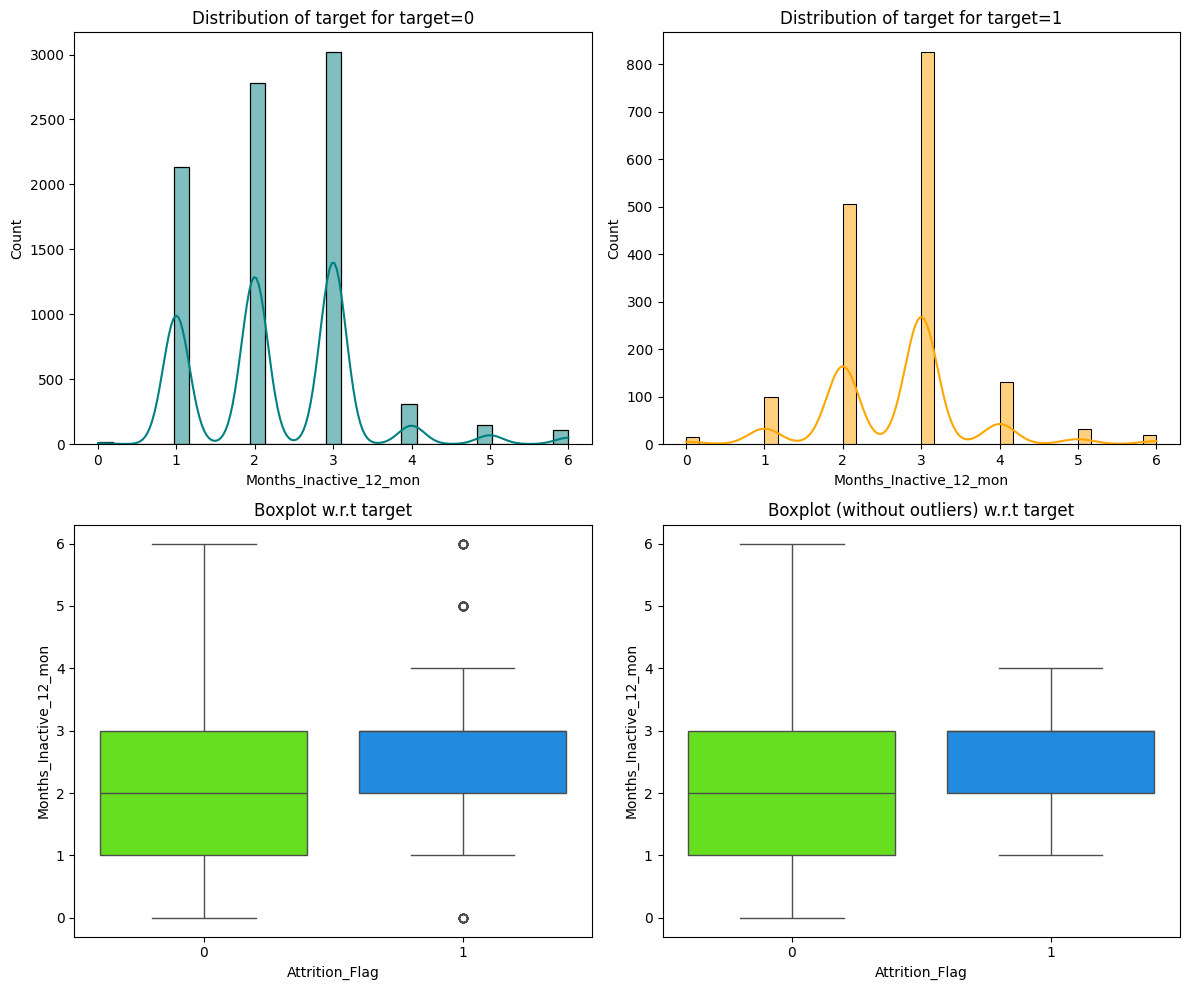

In [ ]:
distribution_plot_wrt_target(data,'Months_Inactive_12_mon','Attrition_Flag')

Months inactive and attrition shows some correlation

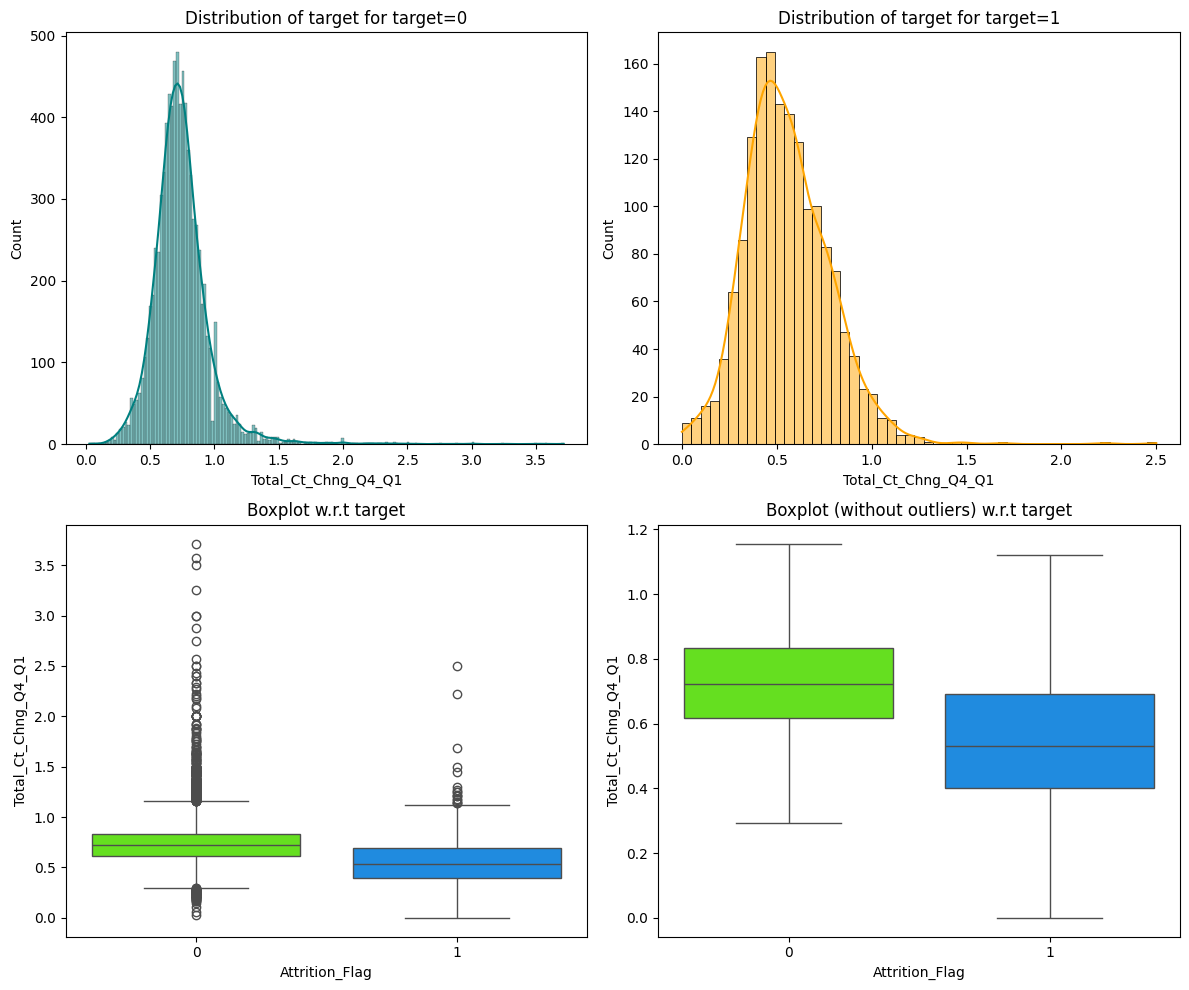

In [ ]:
distribution_plot_wrt_target(data,'Total_Ct_Chng_Q4_Q1','Attrition_Flag')

Change in total transaction count has a correlation with the target variable

<Axes: >

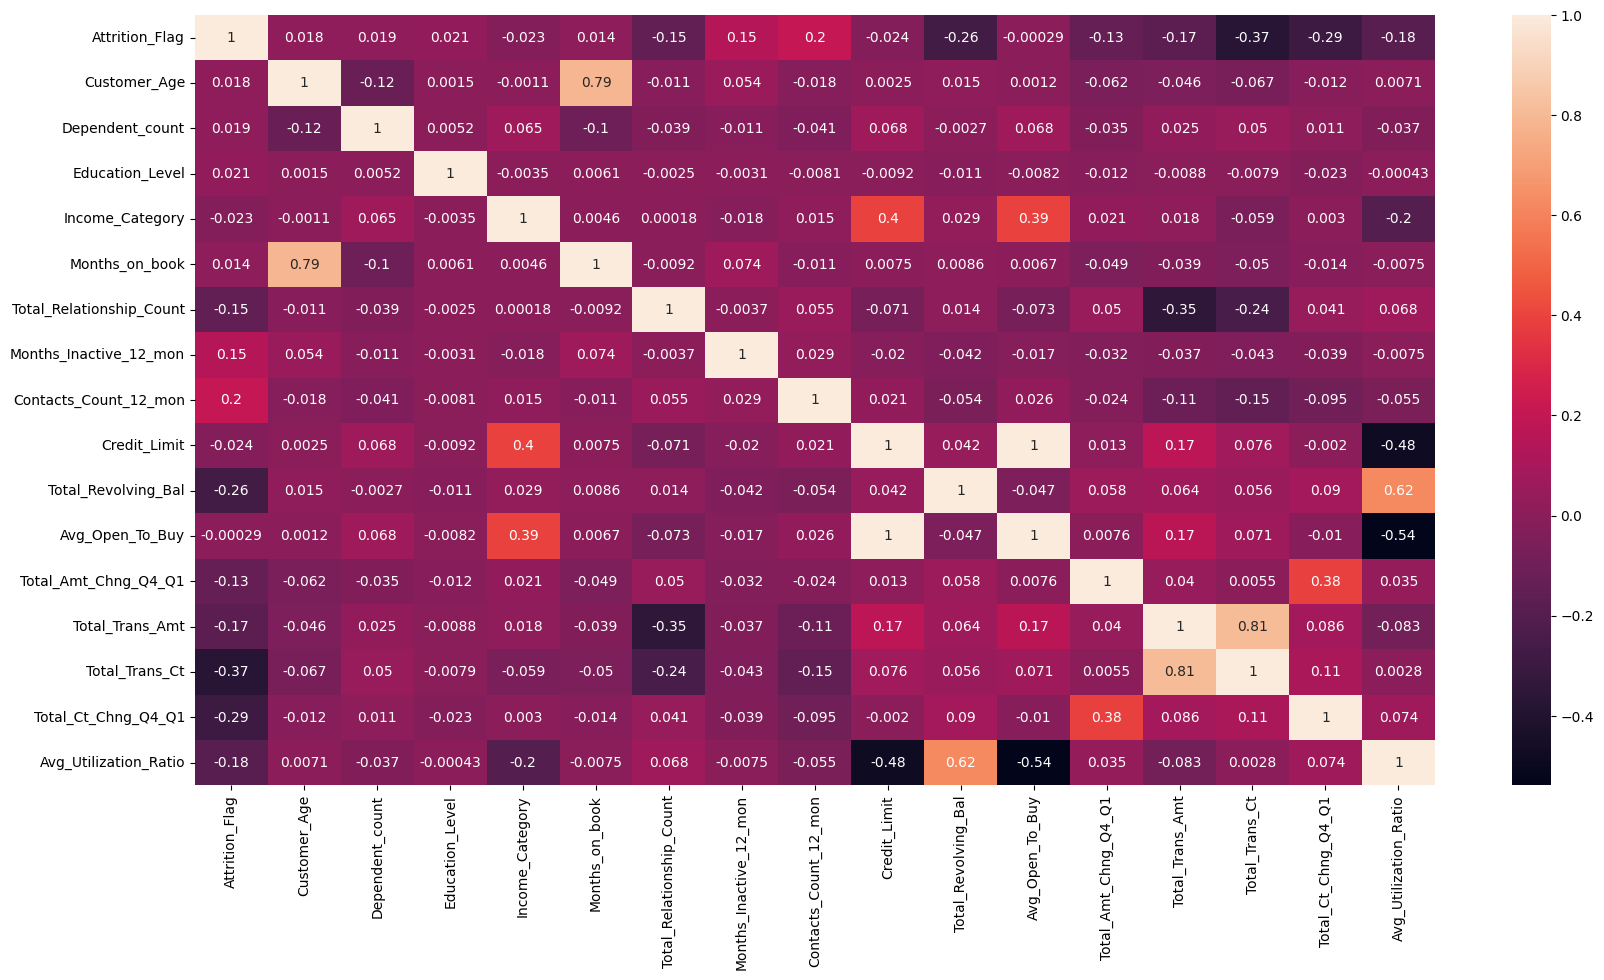

In [ ]:
#let us plot a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.select_dtypes(include=['int64','float64']).corr(),annot=True)

In [ ]:
#Let us do heatmap analysis on the original dataset
data.orig = pd.read_csv("/content/drive/My Drive/Python Course/BankChurners.csv")

<Axes: xlabel='Marital_Status', ylabel='count'>

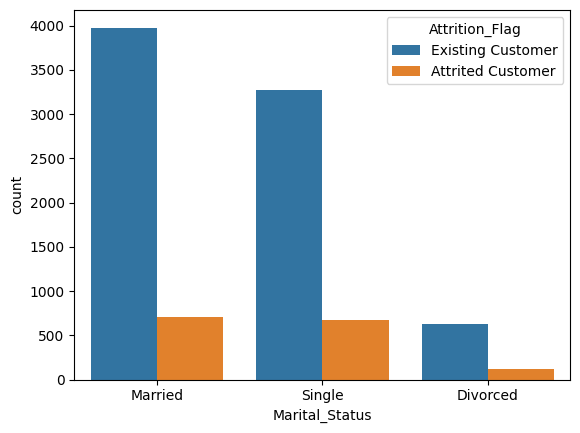

In [ ]:
sns.countplot(data=data.orig,hue='Attrition_Flag',x='Marital_Status')

People with single marital status have higher probability of attriting

<Axes: xlabel='Card_Category', ylabel='count'>

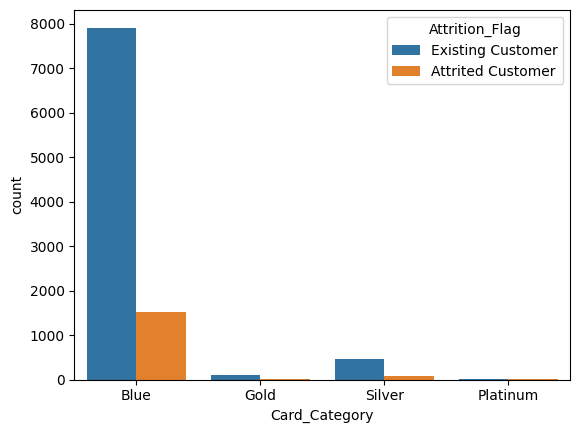

In [ ]:
sns.countplot(data=data.orig,hue='Attrition_Flag',x='Card_Category')

Can't make out any obvious patterns

<Axes: xlabel='Gender', ylabel='count'>

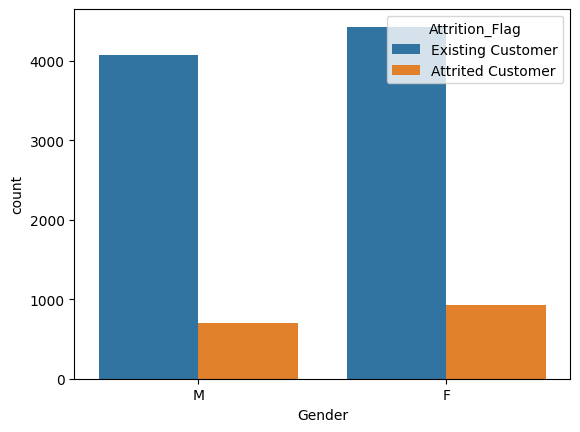

In [ ]:
sns.countplot(data=data.orig,hue='Attrition_Flag',x='Gender')

No obvious patterns

<Axes: xlabel='Education_Level', ylabel='count'>

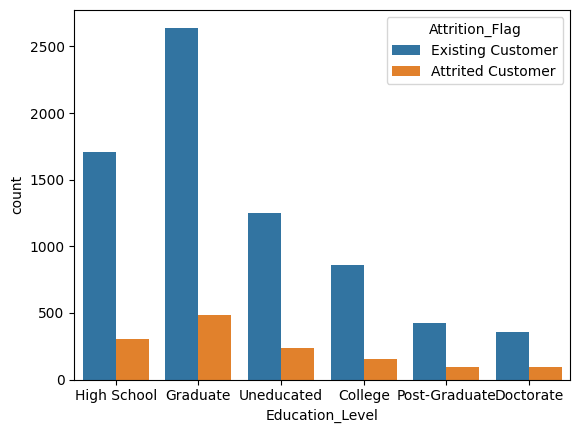

In [ ]:
sns.countplot(data=data.orig,hue='Attrition_Flag',x='Education_Level')

Can't make out any obvious patterns, but graduates looks like to have more chance of not attriting.

Attrition flag has negative correlation with Total_revolving_balance, total_trans_ct and total_ct_chng_Q4_Q1.

This means that customers with higher balance on the credit card, performing more number of transaction and doing more transactions in Q4 when compared to Q1 had less chance of stopping the credit card.

Some of the attributes showing positive correlation are:
* age and months on book
* Income category and credit limit
* income category and open to buy
* Total revolving balance and average utilization ration
* Total transaction count and total transaction amount.
* Total count change and amount change between Q4 and Q1.

Some of the attributes showing negative correlation are:
* Attrition and total revolving balance, total transaction count and total change in transaction count between Q4 and Q1.
* Total number of relationship with total transaction amount and total transaction count.
* Credit limit with average utilization ratio
* Average open to buy with average utilization ratio

<Axes: xlabel='Total_Relationship_Count', ylabel='Total_Trans_Amt'>

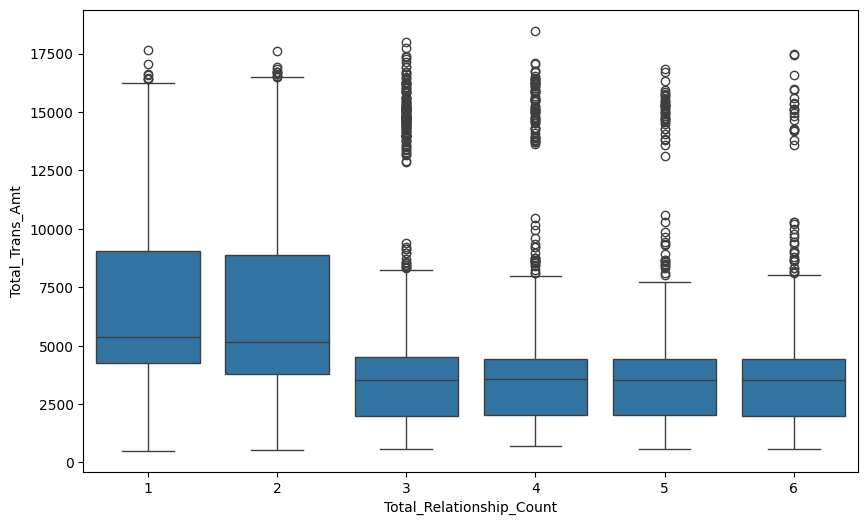

In [ ]:
#There seems a negative correlation between total transaction count and total transaction amount - which does not look correct - let us verify this.
# Similarly between total transaction count as well
#box plot between total relationship count and total transaction amount
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Total_Relationship_Count',y='Total_Trans_Amt')

<Axes: xlabel='Total_Relationship_Count', ylabel='Total_Trans_Ct'>

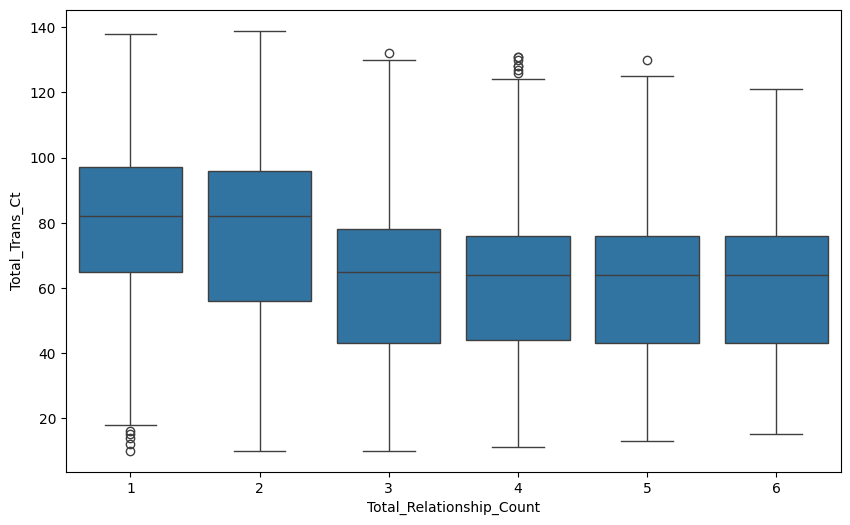

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Total_Relationship_Count',y='Total_Trans_Ct')

Indeed both have negative correlation with total relationship count.

## Data Pre-processing

In [ ]:
data['Marital_Status'].isnull().sum()

749

In [ ]:
#Let us find the count of different marital statuses
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,4687
Single,3943
Divorced,748


In [ ]:
#Impute Marital status with a new category 'Unknown'
data['Marital_Status'].fillna('Unknown',inplace=True)

In [ ]:
data['Marital_Status'].isnull().sum()

0

In [ ]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [ ]:
#Let us separate the independent and dependent variables
X = data.drop(["Attrition_Flag"],axis=1)
y = data["Attrition_Flag"]






In [ ]:
y=y.astype(float)
y.head()

,Attrition_Flag
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Missing value imputation should be done after train test split. So let us proceed with the split.

In [ ]:
#let us split data into train, validate and test
X_temp,X_test,y_temp,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [ ]:
#Let us further split temp into train and validate
X_train,X_val,y_train,y_val=train_test_split(X_temp,y_temp,test_size=0.4,random_state=1)

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((4860, 19), (3241, 19), (2026, 19))

In [ ]:
y_train.shape,y_val.shape,y_test.shape

((4860,), (3241,), (2026,))

## Missing value imputation




In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 7698 to 5263
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              4860 non-null   int64  
 1   Gender                    4860 non-null   object 
 2   Dependent_count           4860 non-null   int64  
 3   Education_Level           4128 non-null   float64
 4   Marital_Status            4860 non-null   object 
 5   Income_Category           4505 non-null   float64
 6   Card_Category             4860 non-null   object 
 7   Months_on_book            4860 non-null   int64  
 8   Total_Relationship_Count  4860 non-null   int64  
 9   Months_Inactive_12_mon    4860 non-null   int64  
 10  Contacts_Count_12_mon     4860 non-null   int64  
 11  Credit_Limit              4860 non-null   float64
 12  Total_Revolving_Bal       4860 non-null   int64  
 13  Avg_Open_To_Buy           4860 non-null   float64
 14  Total_Amt_

In [ ]:
X_train['Education_Level'].value_counts()

,count
Education_Level,
4.0,1517
2.0,939
1.0,722
3.0,477
5.0,242
6.0,231


In [ ]:
X_train['Education_Level'].isnull().sum()


732

In [ ]:
X_val['Education_Level'].isnull().sum()


467

In [ ]:
X_test['Education_Level'].isnull().sum()

320

In [ ]:
X_train['Education_Level'].mode()[0]

4.0

In [ ]:
#we will impute this with the mode
X_train['Education_Level'].fillna(X_train['Education_Level'].mode()[0],inplace=True)
X_val['Education_Level'].fillna(X_train['Education_Level'].mode()[0],inplace=True)
X_test['Education_Level'].fillna(X_train['Education_Level'].mode()[0],inplace=True)

In [ ]:
X_train['Education_Level'].isnull().sum()

0

In [ ]:
X_val['Education_Level'].isnull().sum()

0

In [ ]:
X_test['Education_Level'].isnull().sum()

0

In [ ]:
X_train['Income_Category'].isnull().sum()

355

In [ ]:
X_train['Income_Category'].mode()[0]

1.0

In [ ]:
#we will impute this the missing values with the mode
X_train['Income_Category'].fillna(X_train['Income_Category'].mode()[0],inplace=True)
X_val['Income_Category'].fillna(X_train['Income_Category'].mode()[0],inplace=True)
X_test['Income_Category'].fillna(X_train['Income_Category'].mode()[0],inplace=True)

In [ ]:
X_val['Income_Category'].isnull().sum()

0

In [ ]:
X_test['Income_Category'].isnull().sum()

0

In [ ]:
y.head()

,Attrition_Flag
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
y.isnull().sum()

0

In [ ]:
y.value_counts()

,count
Attrition_Flag,
0.0,8500
1.0,1627


In [ ]:
#create dummy variables for training data
X_train = pd.get_dummies(X_train, columns=X_train.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X_train = X_train.astype(float)
X_train.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
7698,56.0,2.0,2.0,0.0,51.0,4.0,1.0,3.0,1796.0,1243.0,...,87.0,0.891,0.692,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3793,41.0,3.0,6.0,3.0,34.0,5.0,3.0,2.0,12420.0,0.0,...,70.0,0.628,0.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6440,52.0,0.0,2.0,1.0,39.0,5.0,3.0,3.0,34516.0,216.0,...,47.0,0.306,0.006,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1200,39.0,3.0,2.0,1.0,36.0,6.0,1.0,3.0,3651.0,0.0,...,19.0,1.111,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6288,41.0,5.0,4.0,4.0,31.0,3.0,3.0,1.0,12114.0,1379.0,...,90.0,0.837,0.114,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#create dummy variables for validation data
X_val = pd.get_dummies(X_val, columns=X_val.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X_val = X_val.astype(float)
X_val.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
18,61.0,1.0,2.0,2.0,56.0,2.0,2.0,3.0,3193.0,2517.0,...,30.0,1.143,0.788,1.0,1.0,0.0,0.0,0.0,0.0,0.0
833,38.0,2.0,4.0,3.0,36.0,3.0,3.0,3.0,6692.0,2037.0,...,36.0,0.241,0.304,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9261,46.0,4.0,4.0,1.0,36.0,2.0,1.0,2.0,3973.0,0.0,...,131.0,0.819,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5974,46.0,4.0,3.0,4.0,34.0,5.0,3.0,2.0,13734.0,568.0,...,67.0,0.861,0.041,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6782,42.0,1.0,1.0,4.0,29.0,4.0,3.0,3.0,17506.0,1979.0,...,73.0,0.659,0.113,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_test = pd.get_dummies(X_test, columns=X_test.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X_test = X_test.astype(float)
X_test.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
6498,43.0,2.0,4.0,1.0,36.0,6.0,3.0,2.0,2570.0,2107.0,...,83.0,0.766,0.820,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9013,38.0,1.0,3.0,1.0,32.0,2.0,3.0,3.0,2609.0,1259.0,...,96.0,0.627,0.483,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2053,39.0,2.0,3.0,3.0,31.0,6.0,3.0,2.0,9871.0,1061.0,...,34.0,0.478,0.107,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3211,44.0,4.0,4.0,1.0,32.0,6.0,3.0,4.0,34516.0,2517.0,...,83.0,0.596,0.073,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5559,38.0,2.0,6.0,1.0,28.0,5.0,2.0,4.0,1614.0,0.0,...,46.0,0.438,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Model Building

In [ ]:
#let us build a decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

In [ ]:
#let us build a bagging classifier
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(random_state=1)
bc.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [ ]:
#let us build a random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#let us build a adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#let us build a gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#let us build a xgboost classifier
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are customer churn correctly predicted by the model.
- False negatives (FN) are the population which the model predicted that the customer would stay, but in reality they churned.
- False positives (FP) are customers the model predicted will churn, but in reality stayed.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of customer churn are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a customer will stay when in reality they will churn, is a bigger loss to the company.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree orig", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging orig", BaggingClassifier(random_state=1)))
models.append(("Random forest orig", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost orig", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting orig", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost orig", XGBClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision tree orig: 1.0
Bagging orig: 0.9770114942528736
Random forest orig: 1.0
AdaBoost orig: 0.8773946360153256
Gradient Boosting orig: 0.8991060025542784
XGBoost orig: 1.0

Validation Performance:

Decision tree orig: 0.7855750487329435
Bagging orig: 0.7738791423001949
Random forest orig: 0.7173489278752436
AdaBoost orig: 0.8031189083820662
Gradient Boosting orig: 0.8226120857699805
XGBoost orig: 0.8401559454191033


XGBoost has the best performance amongst all the models

Let us check all the performance metrics for all the models

In [ ]:
from typing_extensions import final
# Initialize an empty list to store performance DataFrames
performance_dataframes = []

# Loop through each model, compute metrics, and append to list
for name, model in models:
    model.fit(X_train, y_train)
    df_perf = model_performance_classification_sklearn(model, X_val, y_val)  # Replace X_val, y_val with your data
    df_perf["Model"] = name  # Add a column for the model name
    performance_dataframes.append(df_perf)

# Combine all DataFrames into one
orig_performance_df = pd.concat(performance_dataframes, ignore_index=True).reset_index(drop=True)

orig_performance_df = orig_performance_df[["Model", "Accuracy", "Recall", "Precision", "F1"]]

orig_performance_df.set_index("Model", inplace=True)

# Display the final DataFrame
print(orig_performance_df)

                        Accuracy    Recall  Precision        F1
Model                                                          
Decision tree orig      0.936748  0.785575   0.809237  0.797230
Bagging orig            0.950015  0.773879   0.896163  0.830544
Random forest orig      0.950015  0.717349   0.955844  0.819599
AdaBoost orig           0.955569  0.803119   0.905495  0.851240
Gradient Boosting orig  0.962974  0.822612   0.935698  0.875519
XGBoost orig            0.965751  0.840156   0.936957  0.885920


### Model Building with Oversampled data


In [ ]:
y_train.value_counts()

,count
Attrition_Flag,
0.0,4077
1.0,783


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
X_train_over.shape, y_train_over.shape

((8154, 23), (8154,))

Let us fit and check the performance of the different models on oversampled data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree over", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging over", BaggingClassifier(random_state=1)))
models.append(("Random forest over", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost over", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting over", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost over", XGBClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision tree over: 1.0
Bagging over: 0.9977924944812362
Random forest over: 1.0
AdaBoost over: 0.9730193769928869
Gradient Boosting over: 0.9833210694137846
XGBoost over: 1.0

Validation Performance:

Decision tree over: 0.7875243664717348
Bagging over: 0.7524366471734892
Random forest over: 0.7660818713450293
AdaBoost over: 0.8382066276803118
Gradient Boosting over: 0.8771929824561403
XGBoost over: 0.8654970760233918


Gradient Boosting and XGBoost has the best performance on the validation set

Let us check all the performance metrics of all the models

In [ ]:
from typing_extensions import final
# Initialize an empty list to store performance DataFrames
performance_dataframes = []

# Loop through each model, compute metrics, and append to list
for name, model in models:
    model.fit(X_train_over, y_train_over)
    df_perf = model_performance_classification_sklearn(model, X_val, y_val)  # Replace X_val, y_val with your data
    df_perf["Model"] = name  # Add a column for the model name
    performance_dataframes.append(df_perf)

# Combine all DataFrames into one
over_performance_df = pd.concat(performance_dataframes, ignore_index=True).reset_index(drop=True)

over_performance_df = over_performance_df[["Model", "Accuracy", "Recall", "Precision", "F1"]]

over_performance_df.set_index("Model", inplace=True)

# Display the final DataFrame
print(over_performance_df)

                        Accuracy    Recall  Precision        F1
Model                                                          
Decision tree over      0.925640  0.787524   0.753731  0.770257
Bagging over            0.939525  0.752437   0.848352  0.797521
Random forest over      0.948781  0.766082   0.895216  0.825630
AdaBoost over           0.947856  0.838207   0.833333  0.835763
Gradient Boosting over  0.963591  0.877193   0.891089  0.884086
XGBoost over            0.966985  0.865497   0.921162  0.892462


Boosting techniques have the best recall, preceision and F1 scores

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
X_train_un.shape, y_train_un.shape

((1566, 23), (1566,))

Let us check the recall performance of the models trained on undersampled data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree under", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging under", BaggingClassifier(random_state=1)))
models.append(("Random forest under", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost under", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting under", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost under", XGBClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision tree under: 1.0
Bagging under: 0.9948914431673053
Random forest under: 1.0
AdaBoost under: 0.9578544061302682
Gradient Boosting under: 0.9872286079182631
XGBoost under: 1.0

Validation Performance:

Decision tree under: 0.8927875243664717
Bagging under: 0.9083820662768031
Random forest under: 0.9337231968810916
AdaBoost under: 0.9337231968810916
Gradient Boosting under: 0.9376218323586745
XGBoost under: 0.9415204678362573


In [ ]:

# Initialize an empty list to store performance DataFrames
performance_dataframes = []

# Loop through each model, compute metrics, and append to list
for name, model in models:
    model.fit(X_train_un, y_train_un)
    df_perf = model_performance_classification_sklearn(model, X_val, y_val)  # Replace X_val, y_val with your data
    df_perf["Model"] = name  # Add a column for the model name
    performance_dataframes.append(df_perf)

# Combine all DataFrames into one
under_performance_df = pd.concat(performance_dataframes, ignore_index=True).reset_index(drop=True)

under_performance_df = under_performance_df[["Model", "Accuracy", "Recall", "Precision", "F1"]]

under_performance_df.set_index("Model", inplace=True)

# Display the final DataFrame
print(under_performance_df)

                         Accuracy    Recall  Precision        F1
Model                                                           
Decision tree under      0.900648  0.892788   0.631724  0.739903
Bagging under            0.939833  0.908382   0.758958  0.826974
Random forest under      0.934897  0.933723   0.730183  0.819504
AdaBoost under           0.931503  0.933723   0.718141  0.811864
Gradient Boosting under  0.946004  0.937622   0.770833  0.846086
XGBoost under            0.954027  0.941520   0.802326  0.866368


All of the models trained on undersampled data has a good recall

Even though recall is good for all the models, precision is good only for gradient boosting and XGBoost

In [ ]:
#Let us compare the performance of all the models before hyperparameter tuning

pd_before_tuning = pd.concat([orig_performance_df, over_performance_df, under_performance_df], axis=0)

#let us sort this by recall
pd_before_tuning = pd_before_tuning.sort_values(by='Recall', ascending=False)
pd_before_tuning

,Accuracy,Recall,Precision,F1
Model,,,,
XGBoost under,0.954027,0.941520,0.802326,0.866368
Gradient Boosting under,0.946004,0.937622,0.770833,0.846086
AdaBoost under,0.931503,0.933723,0.718141,0.811864
Random forest under,0.934897,0.933723,0.730183,0.819504
Bagging under,0.939833,0.908382,0.758958,0.826974
Decision tree under,0.900648,0.892788,0.631724,0.739903
Gradient Boosting over,0.963591,0.877193,0.891089,0.884086
XGBoost over,0.966985,0.865497,0.921162,0.892462
XGBoost orig,0.965751,0.840156,0.936957,0.885920


Models trained with undersampled data has the best recall performance, out of the models XGBoost, Gradient and Adaboost trained on undersampled data have the highest recall performance. Let us shortlist these models for hyperparameter tuning.

### HyperparameterTuning

The best performance by the models was on the undersampled data. The 3 boosting techniques gave the best performance consistently against normal, over sampled and under sampled data.

We will try to improve adaboost, gradient boosting and XGBoost trained on under sampled data by tuning hyperparameters

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Hyperparameter tuning of adaboost model with undersampled data

Let us perform hyperparameter training of the Adaboost model trained on under sampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,200,25),
    "learning_rate": [0.001,0.01,0.1,1,10],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)]

}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))




Best parameters are {'n_estimators': 150, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9553160215580598:


In [ ]:
print(randomized_cv.estimator)

AdaBoostClassifier(random_state=1)


In [ ]:
adaboost_tuned = randomized_cv.best_estimator_
adaboost_tuned.fit(X_train_un,y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=150, random_state=1)

In [ ]:
# Initialize an empty list to store performance DataFrames
performance_dataframes = []

# Loop through each model, compute metrics, and append to list

adaboost_tuned.fit(X_train_un, y_train_un)
df_perf = model_performance_classification_sklearn(adaboost_tuned, X_val, y_val)  # Replace X_val, y_val with your data
df_perf["Model"] = "Adaboost tuned"  # Add a column for the model name
performance_dataframes.append(df_perf)

# Combine all DataFrames into one
adaboost_tuned_performance_df = pd.concat(performance_dataframes, ignore_index=True).reset_index(drop=True)

adaboost_tuned_performance_df = adaboost_tuned_performance_df[["Model", "Accuracy", "Recall", "Precision", "F1"]]

adaboost_tuned_performance_df.set_index("Model", inplace=True)

# Display the final DataFrame
print(adaboost_tuned_performance_df)

                Accuracy   Recall  Precision        F1
Model                                                 
Adaboost tuned  0.950633  0.94152   0.787928  0.857904


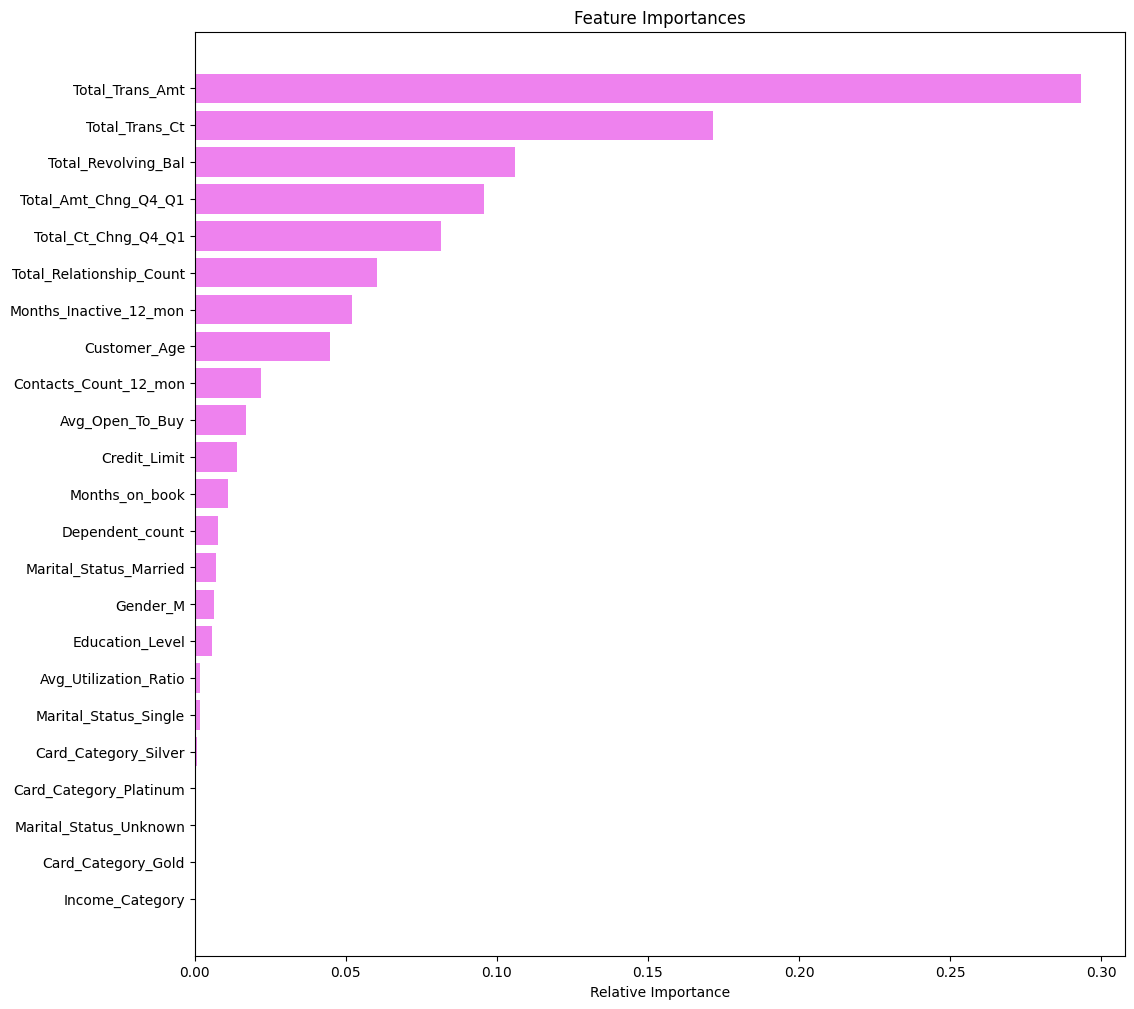

In [ ]:
feature_names = X_train_un.columns
importances = adaboost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Adaboost model trained on undersampled data without hyperparameter tuning had a precision of 93.4 and a precision of 71.1.

With hyperparameter tuning, recall and precision increased to 94.1 and 78.8 respectively.

In [ ]:
#Now let us do hyperparameter tuning to the gradient boosting model
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,200,25),
    "learning_rate": [0.001, 0.01, 0.1, 1, 10],
    "subsample":[0.7,0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=20, scoring='recall', cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'subsample': 0.8, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9514780336436388:


In [ ]:
gradientboost_tuned = randomized_cv.best_estimator_
gradientboost_tuned.fit(X_train_un,y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, n_estimators=150, random_state=1,
                           subsample=0.8)

In [ ]:
# Initialize an empty list to store performance DataFrames
performance_dataframes = []

# Loop through each model, compute metrics, and append to list

gradientboost_tuned.fit(X_train_un, y_train_un)
df_perf = model_performance_classification_sklearn(gradientboost_tuned, X_val, y_val)  # Replace X_val, y_val with your data
df_perf["Model"] = "Gradientboost tuned"  # Add a column for the model name
performance_dataframes.append(df_perf)

# Combine all DataFrames into one
gradientboost_tuned_performance_df = pd.concat(performance_dataframes, ignore_index=True).reset_index(drop=True)

gradientboost_tuned_performance_df = gradientboost_tuned_performance_df[["Model", "Accuracy", "Recall", "Precision", "F1"]]

gradientboost_tuned_performance_df.set_index("Model", inplace=True)

# Display the final DataFrame
print(gradientboost_tuned_performance_df)

                     Accuracy    Recall  Precision        F1
Model                                                       
Gradientboost tuned  0.950633  0.947368   0.785137  0.858657


Gradient boosting model trained on undersampled data on validation data had a recall of 93.7 and a precision of 93.8 and 77.1.

With hyperparameter tuning, the recall and precision increased to 94.7 and 78.5 respectively.

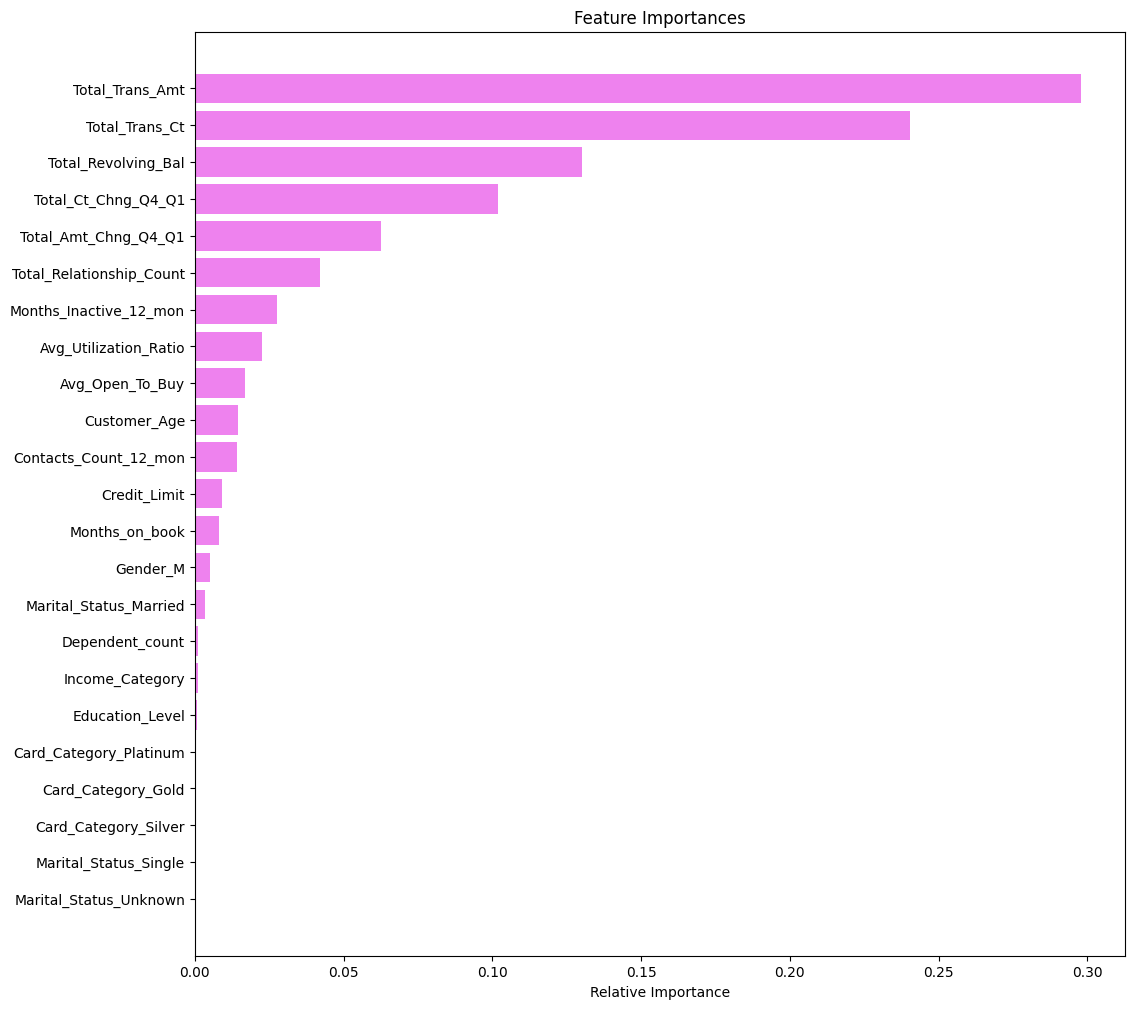

In [ ]:
feature_names = X_train_un.columns
importances = gradientboost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#let us perform hyperparameter tuning of the XGBoost model
model=XGBClassifier(random_state=1)

parameters = {'n_estimators': [75,100,125,150],
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Run the grid search
grid_obj = RandomizedSearchCV(model, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
xgboost_tuned = grid_obj.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'subsample': 0.8, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9514780336436388:


In [ ]:
# Initialize an empty list to store performance DataFrames
performance_dataframes = []

# Loop through each model, compute metrics, and append to list

xgboost_tuned.fit(X_train_un, y_train_un)
df_perf = model_performance_classification_sklearn(xgboost_tuned, X_val, y_val)  # Replace X_val, y_val with your data
df_perf["Model"] = "XGboost tuned"  # Add a column for the model name
performance_dataframes.append(df_perf)

# Combine all DataFrames into one
xgboost_tuned_performance_df = pd.concat(performance_dataframes, ignore_index=True).reset_index(drop=True)

xgboost_tuned_performance_df = xgboost_tuned_performance_df[["Model", "Accuracy", "Recall", "Precision", "F1"]]

xgboost_tuned_performance_df.set_index("Model", inplace=True)

# Display the final DataFrame
print(xgboost_tuned_performance_df)

               Accuracy    Recall  Precision        F1
Model                                                 
XGboost tuned  0.947547  0.937622    0.77706  0.849823


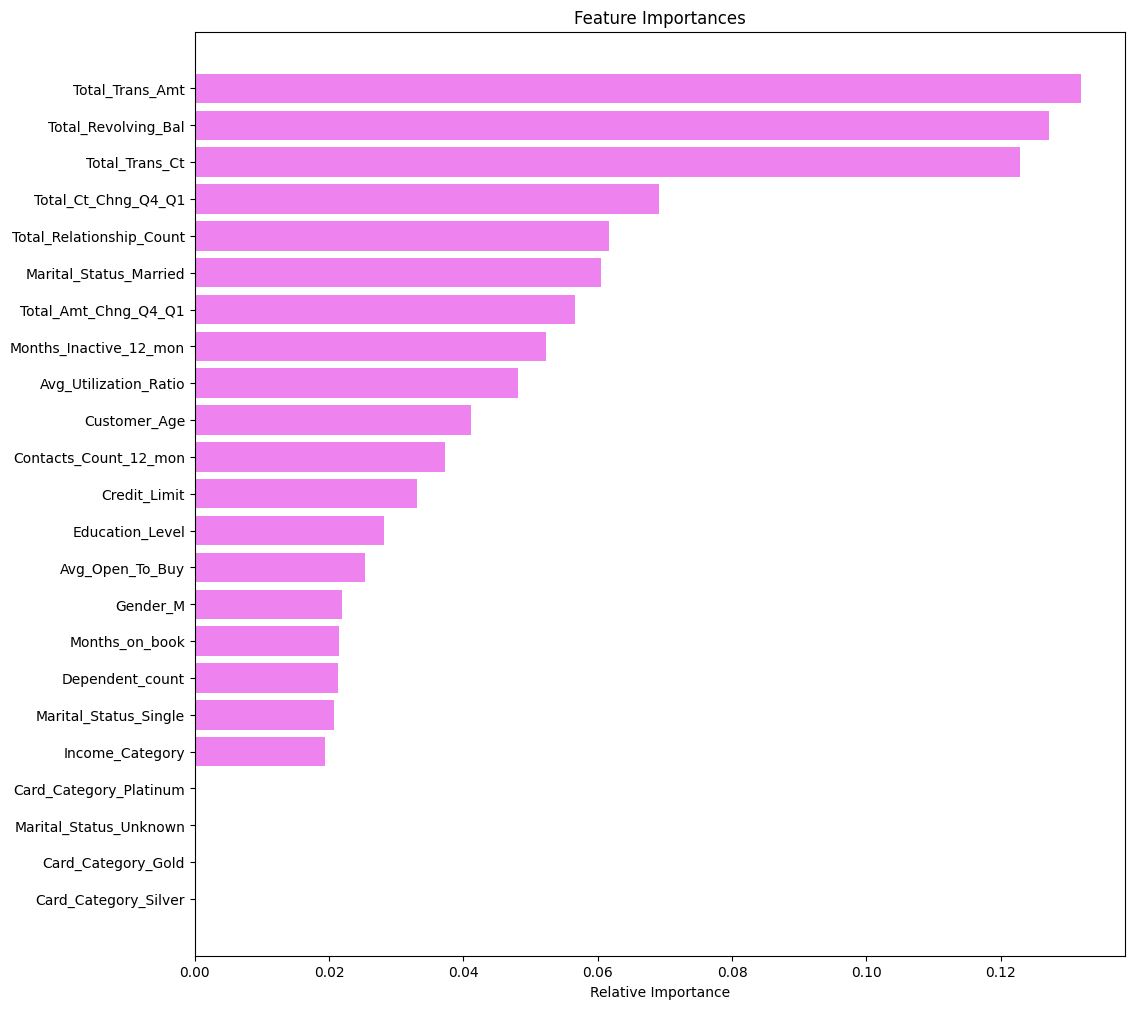

In [ ]:
feature_names = X_train_un.columns
importances = xgboost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Gradient boosting model on undersampled data had a recall of 94.2 and precision of 80.2.

With hyperparameter tuning it had a recall of 94.2 and 78.9

## Model Comparison and Final Model Selection

Let us concatenate the performance of hypertuned models to our performance dataframe

In [ ]:
#Let us compare the performance of all the models before hyperparameter tuning

pd_all_models = []
pd_all_models = pd.concat([pd_before_tuning,adaboost_tuned_performance_df, gradientboost_tuned_performance_df, xgboost_tuned_performance_df], axis=0)

#let us sort this by recall
pd_all_models = pd_all_models.sort_values(by='Recall', ascending=False)
pd_all_models

,Accuracy,Recall,Precision,F1
Model,,,,
Gradientboost tuned,0.950633,0.947368,0.785137,0.858657
XGBoost under,0.954027,0.941520,0.802326,0.866368
Adaboost tuned,0.950633,0.941520,0.787928,0.857904
Gradient Boosting under,0.946004,0.937622,0.770833,0.846086
XGboost tuned,0.947547,0.937622,0.777060,0.849823
Random forest under,0.934897,0.933723,0.730183,0.819504
AdaBoost under,0.931503,0.933723,0.718141,0.811864
Bagging under,0.939833,0.908382,0.758958,0.826974
Decision tree under,0.900648,0.892788,0.631724,0.739903


Hyperparameter tuned XGBoost model trained on under sampled data has the highest recall with a decent precision. We will finalize this as our model if the performance on test data is good.

Also XGBoost has the following advantages when compared to other models:
1. High performance and speed
2. Handles missing values
3. Regularization techniques prevents overfitting
4. Built in cross validation
5. Robust to multicollinearity
6. Effective for unbalanced data
7. Scalability
8. Support for distributed systems


### Test set final performance

Let us check the performance of the model on test data

In [ ]:
model_performance_classification_sklearn(xgboost_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.941264,0.945619,0.756039,0.840268


Test data performance of the model is comparable to the performance on the validation data. So this model is selected.

# Business Insights and Conclusions

Total transaction count, total revolving balance, total relationship count, total transaction amount, total count change from Q1 to Q4, and total amount change from Q1 to Q4 are the most important features.

Customer who are transacting more on their cards are more less likely to churn - total transaction count, total transaction amount, total revolving balance and increase in transaction count from Q1 to Q4 all indicate the same - as seen from the EDA analysis these features have negative correlation with churn.

Also customers using more types of credit card products have lesser chance to churn.

Inactive customers are more likely to churn.
Business should coerce the inactive customers to perform more transactions on their credit cards by giving incentives like cashbacks and other offers.

They should also upsell more products to existing customers.

***